In [8]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Musical_instruments_reviews.csv")

In [10]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [11]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [12]:
df.reviewText.fillna("",inplace = True)

/tmp/ipykernel_39269/1702071047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.reviewText.fillna("",inplace = True)


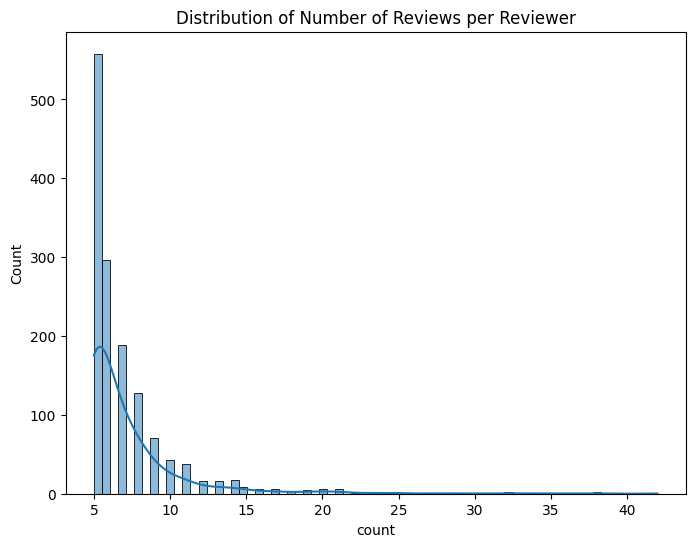

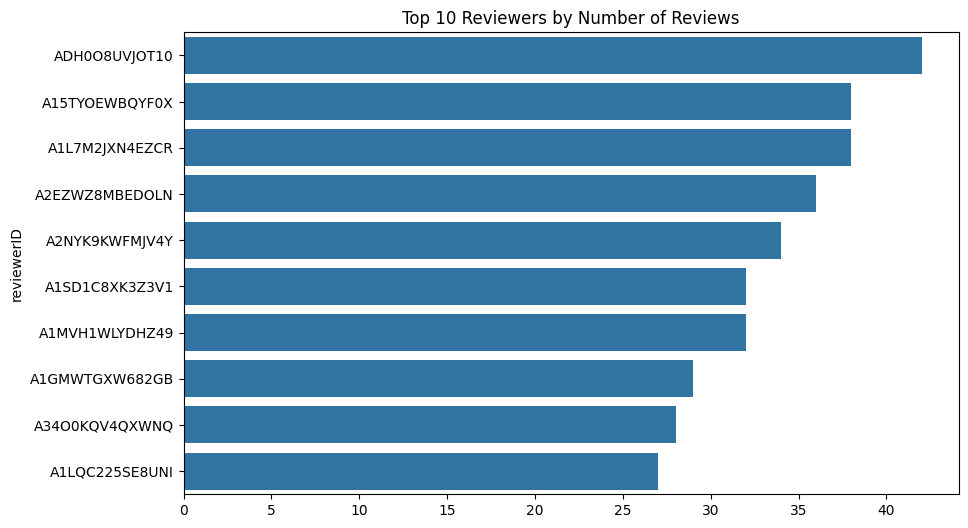

In [13]:
# Number of reviews per reviewer
reviewer_counts = df['reviewerID'].value_counts()

plt.figure(figsize=(8, 6))
sns.histplot(reviewer_counts, kde=True)
plt.title('Distribution of Number of Reviews per Reviewer')
plt.show()

# Top 10 reviewers by number of reviews
top_reviewers = reviewer_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_reviewers.index, x=top_reviewers.values, orient='h')
plt.title('Top 10 Reviewers by Number of Reviews')
plt.show()


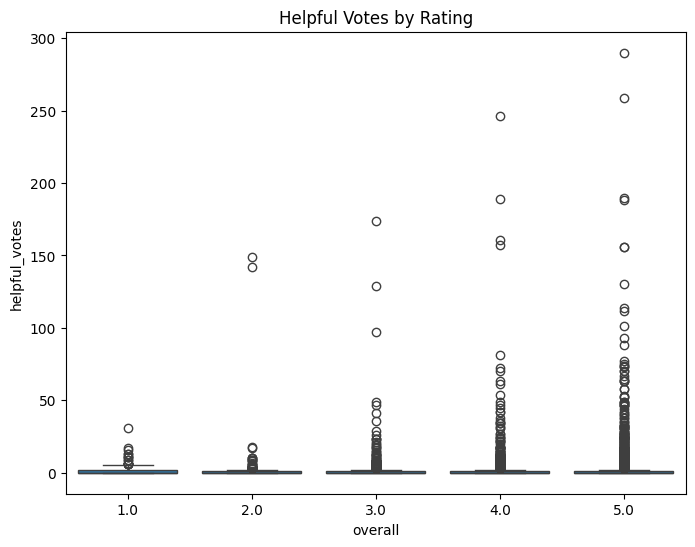

In [14]:
df['helpful_votes'] = df['helpful'].apply(lambda x: int(x.strip('[]').split(',')[0]))
df['total_votes'] = df['helpful'].apply(lambda x: int(x.strip('[]').split(',')[1]))

# Relationship between helpful votes and rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='overall', y='helpful_votes', data=df)
plt.title('Helpful Votes by Rating')
plt.show()


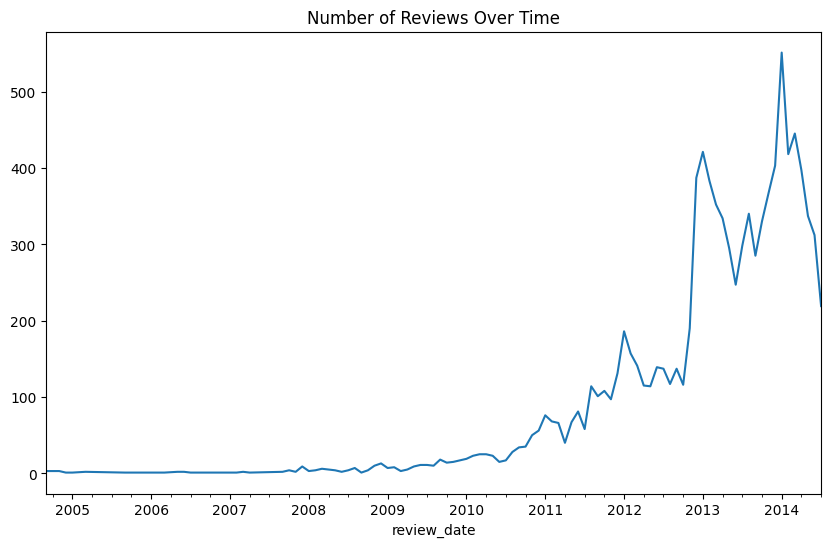

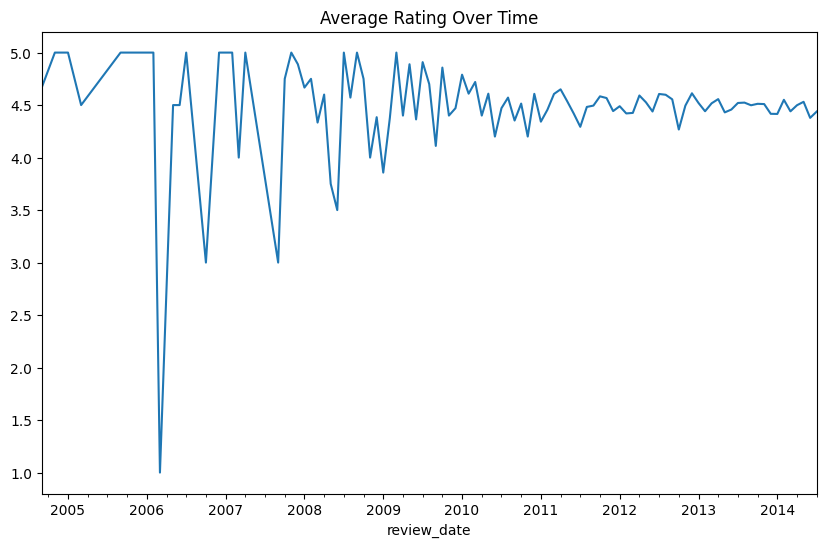

In [15]:
# Convert unixReviewTime to datetime
df['review_date'] = pd.to_datetime(df['unixReviewTime'], unit='s')

# Reviews over time
plt.figure(figsize=(10, 6))
df.groupby(df['review_date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.show()

# Average rating over time
plt.figure(figsize=(10, 6))
df.groupby(df['review_date'].dt.to_period('M'))['overall'].mean().plot(kind='line')
plt.title('Average Rating Over Time')
plt.show()


In [16]:
del df['reviewerID']
del df['asin']
del df['reviewerName']
del df['helpful']
del df['unixReviewTime']
del df['reviewTime']

In [17]:
df.head()

,reviewText,overall,summary,helpful_votes,total_votes,review_date
0,"Not much to write about here, but it does exac...",5.0,good,0,0,2014-02-28
1,The product does exactly as it should and is q...,5.0,Jake,13,14,2013-03-16
2,The primary job of this device is to block the...,5.0,It Does The Job Well,1,1,2013-08-28
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,0,0,2014-02-14
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,0,0,2014-02-21


In [18]:
df['text'] = df['reviewText'] + ' ' + df['summary']
del df['reviewText']
del df['summary']

In [19]:
df.head()

,overall,helpful_votes,total_votes,review_date,text
0,5.0,0,0,2014-02-28,"Not much to write about here, but it does exac..."
1,5.0,13,14,2013-03-16,The product does exactly as it should and is q...
2,5.0,1,1,2013-08-28,The primary job of this device is to block the...
3,5.0,0,0,2014-02-14,Nice windscreen protects my MXL mic and preven...
4,5.0,0,0,2014-02-21,This pop filter is great. It looks and perform...


In [20]:
def sentiment_rating(rating):
    
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.overall = df.overall.apply(sentiment_rating) 

In [21]:
df

,overall,helpful_votes,total_votes,review_date,text
0,1,0,0,2014-02-28,"Not much to write about here, but it does exac..."
1,1,13,14,2013-03-16,The product does exactly as it should and is q...
2,1,1,1,2013-08-28,The primary job of this device is to block the...
3,1,0,0,2014-02-14,Nice windscreen protects my MXL mic and preven...
4,1,0,0,2014-02-21,This pop filter is great. It looks and perform...
...,...,...,...,...,...
10256,1,0,0,2014-07-20,"Great, just as expected. Thank to all. Five S..."
10257,1,0,0,2014-07-02,I've been thinking about trying the Nanoweb st...
10258,1,0,0,2014-07-22,I have tried coated strings in the past ( incl...
10259,1,0,0,2014-07-01,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [22]:
df.overall.value_counts()

overall
1    9022
0    1239
Name: count, dtype: int64

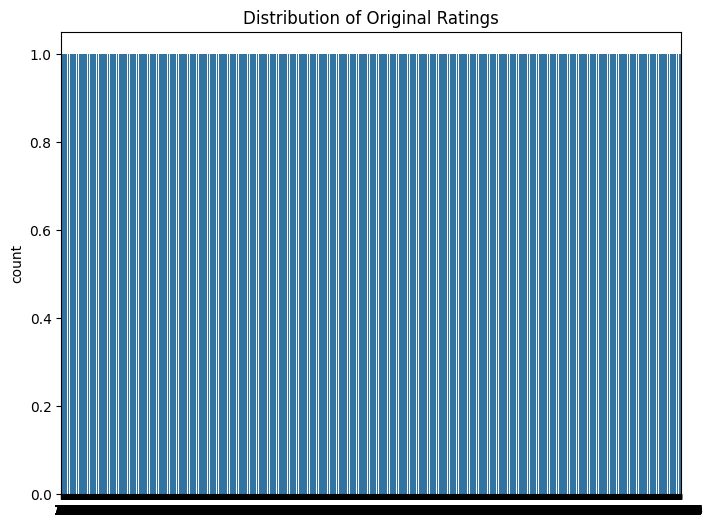

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(df['overall'])
plt.title('Distribution of Original Ratings')
plt.show()


In [24]:
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ubuntulinux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df.columns

Index(['overall', 'helpful_votes', 'total_votes', 'review_date', 'text'], dtype='object')

In [26]:
# Ensure you only keep the necessary columns first
df = df[['overall', 'text']]

# Now rename the columns
df.columns = ['Liked', 'Review']


In [27]:
df

,Liked,Review
0,1,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...
2,1,The primary job of this device is to block the...
3,1,Nice windscreen protects my MXL mic and preven...
4,1,This pop filter is great. It looks and perform...
...,...,...
10256,1,"Great, just as expected. Thank to all. Five S..."
10257,1,I've been thinking about trying the Nanoweb st...
10258,1,I have tried coated strings in the past ( incl...
10259,1,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [28]:
X=df.Review.astype('str')
y=df.Liked

In [29]:
X

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
                               ...                        
10256    Great, just as expected.  Thank to all. Five S...
10257    I've been thinking about trying the Nanoweb st...
10258    I have tried coated strings in the past ( incl...
10259    Well, MADE by Elixir and DEVELOPED with Taylor...
10260    These strings are really quite good, but I wou...
Name: Review, Length: 10261, dtype: object

In [30]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10256    1
10257    1
10258    1
10259    1
10260    1
Name: Liked, Length: 10261, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [34]:
vocab=1000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)


In [35]:
X_train[0]

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, good"

In [36]:
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)

In [37]:
train_sequence[0]

[114,
 1,
 1,
 48,
 1,
 350,
 447,
 15,
 63,
 680,
 81,
 489,
 1,
 2,
 1,
 125,
 1,
 250,
 1,
 5,
 490,
 1,
 7,
 229,
 33,
 3,
 880,
 1,
 193,
 11,
 1,
 12,
 212,
 104,
 5,
 4,
 119,
 1,
 14,
 2,
 1,
 2,
 1,
 23,
 49,
 6,
 1,
 5,
 204,
 869,
 25,
 1,
 96,
 1,
 5,
 1,
 89,
 154,
 51,
 66,
 96]

In [38]:
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

In [39]:
padded_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [40]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

In [43]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab, 1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


2024-08-26 11:59:24.554932: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=5)

Epoch 1/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.8616 - loss: 0.3977 - val_accuracy: 0.8889 - val_loss: 0.3497
Epoch 2/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8747 - loss: 0.3770 - val_accuracy: 0.8889 - val_loss: 0.3510
Epoch 3/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8766 - loss: 0.3740 - val_accuracy: 0.8889 - val_loss: 0.3457
Epoch 4/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.8784 - loss: 0.3661 - val_accuracy: 0.8889 - val_loss: 0.3507
Epoch 5/5
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.8713 - loss: 0.3805 - val_accuracy: 0.8889 - val_loss: 0.3645


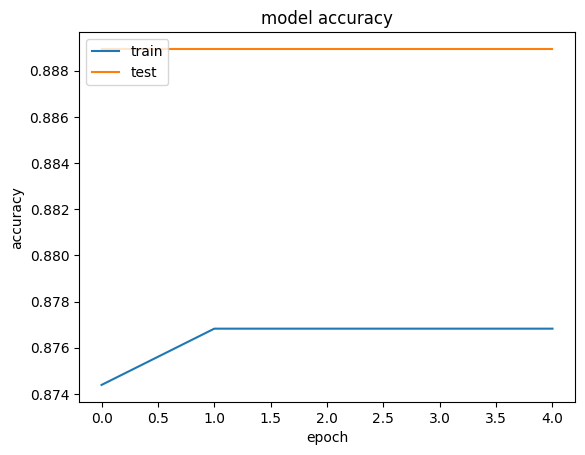

In [46]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
model.save('sentiment_analysis_model.h5')
